# Assignment 3 - Morphology and image thresholding

Prepared by: Yu Feng, Chuan Chen, Yi Zhang (Chair of Cartography and Visual Analytics, TUM)

Contact: y.feng@tum.de, chuan.chen@tum.de

### Dependencies

In [1]:
# Numpy offers comprehensive mathematical functions in Python
import numpy as np

# OpenCV provides a optimized tools for Computer Vision.
import cv2 as cv

# Matplotlib is a library for creating visualizations in Python.
from matplotlib import pyplot as plt

#Scikit-image offers skeletonize method
from skimage import morphology

## Morphology
Morphological transformations are standard operations on binary image masks. Two basic morphological operators are Erosion and Dilation. Two variant forms have been built upon these operatores, such as Opening and Closing.

`Erosion` : shrinks the foreground and removes foreground outliers

`Dilation` : expands the foreground and fills holes

`Opening` : Erosion followed by a dilation

`Closing` : Dilation followed by an erosion

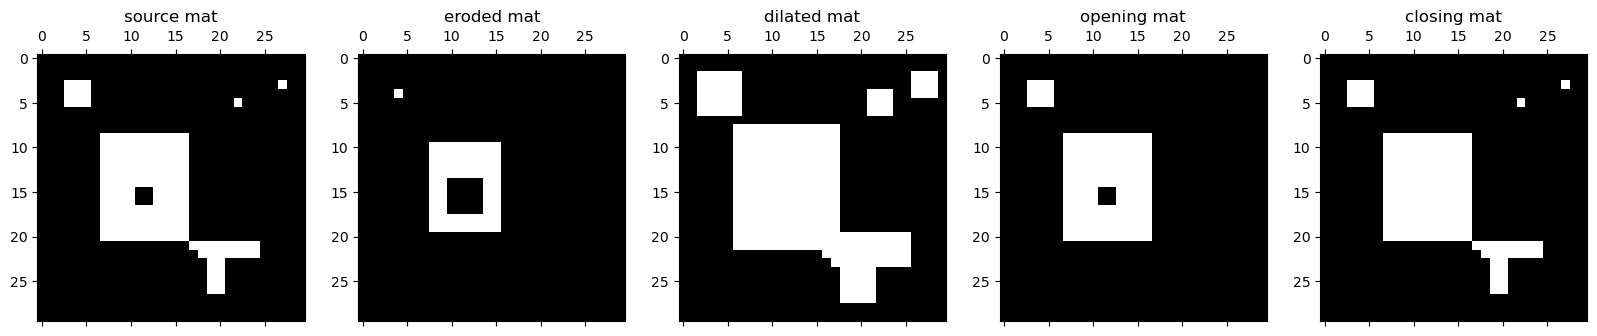

`Distance Transformation` : obtain the derived representation of a binary image, where the value of each pixel is replaced by its distance to the nearest background pixel

`Skeletonize` : reduces binary objects to 1 pixel wide representations


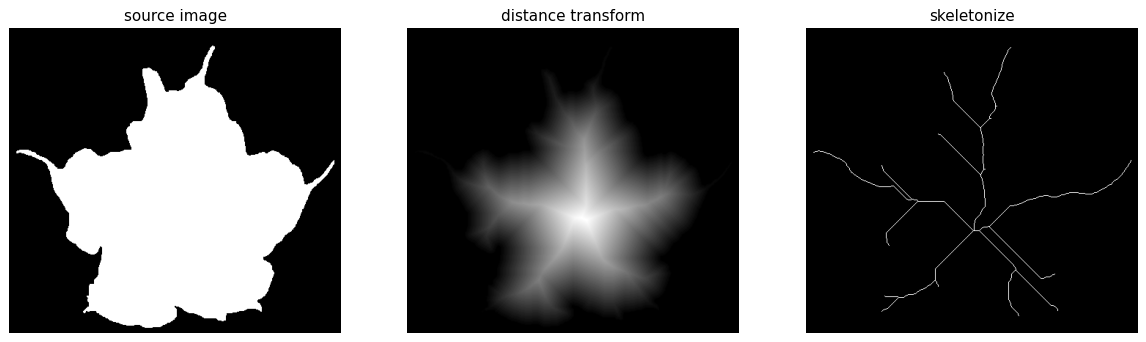

### Task 1: Erosion and Dilation
In this task you will use basic morphological operations:

Steps:
1. create a 3x3 `4-neighbor` kernel
2. create a 3x3 `8-neighbor` kernel
3. apply the **_first_** kernel to erode the given `src_mat`
4. apply the **_second_** kernel to dilate the given `src_mat`
5. apply the first kernel to perform opening operation of the given `src_mat` 
6. apply the second kernel to perform closing operation of the given `src_mat`

Variables:
1. `kernel_4` : 4-neighbor kernel
2. `kernel_8` : 8-neighbor kernel
3. `eroded_mat` : result image after erosion
4. `dilated_mat` : result image after dilation
5. `opening_mat` : result image after opening operation
6. `closing_mat` : result image after closing operation

Hints:
1. Function [cv.getStructuringElement](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gac342a1bb6eabf6f55c803b09268e36dc) to create kernels
2. Function [cv.erode](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb) to erode
3. Function [cv.dilate](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c) to dilate
4. Function [cv.morphologyEx](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f) to implement morphological transformations
5. check [this tutorial](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html) to learn how to use erosion, dilation, opening and closing operation in OpenCV

#### Quiz 1:

__What is the difference you can observe for images applying morpholigical operation with 4 neigbourhood and 8 neigbourhood kernel? What are the reasons for such differences?__

Your answer:

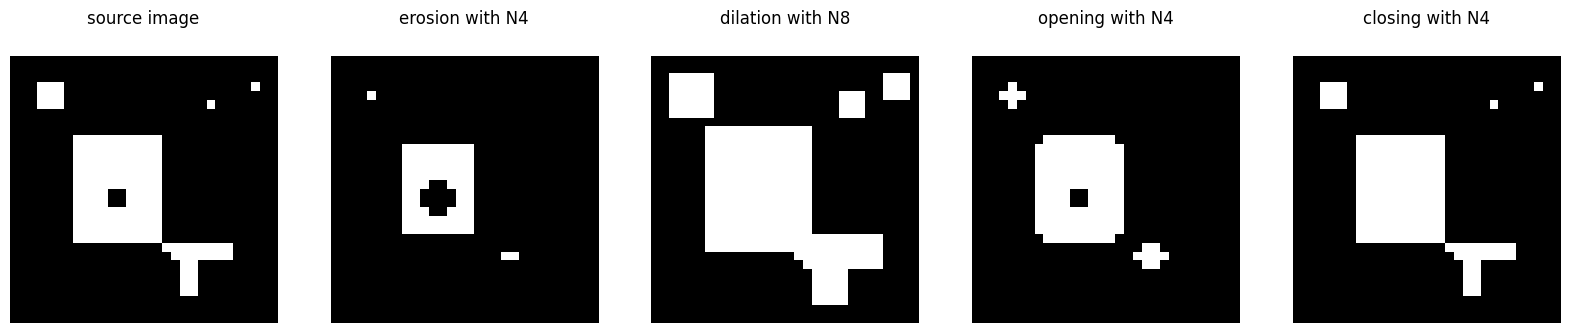

In [2]:
src_mat = np.load('example/src_mat.npy')

### BEGIN SOLUTION



### END SOLUTION


fig, axes = plt.subplots(nrows=1, ncols=5)
fig.set_size_inches(20,10)

axes[0].matshow(src_mat,cmap=plt.cm.gray)
axes[0].set_title('source image')
axes[0].set_axis_off()

axes[1].matshow(eroded_mat,cmap=plt.cm.gray)
axes[1].set_title('erosion with N4')
axes[1].set_axis_off()

axes[2].matshow(dilated_mat,cmap=plt.cm.gray)
axes[2].set_title('dilation with N8')
axes[2].set_axis_off()

axes[3].matshow(opening_mat,cmap=plt.cm.gray)
axes[3].set_title('opening with N4')
axes[3].set_axis_off()

axes[4].matshow(closing_mat,cmap=plt.cm.gray)
axes[4].set_title('closing with N4')
axes[4].set_axis_off()
plt.show()

In [3]:

assert kernel_4[0,0] == 0, 'incorrect 4 neighbor kernel'
assert kernel_8[2,0] == 1, 'incorrect 8 neighbor kernel'
assert eroded_mat[20,20] == 0, f'The value(20,20) in eroded mat is 0 expected, but got: {eroded_mat[20,20]}'
assert dilated_mat[21,25] == 1, f'The value(21,25) in dilated mat is 1 expected, but got: {dilated_mat[21,25]}'
assert opening_mat[3,3] == 0, f'The value(3,3) in opening mat is 0 expected, but got: {opening_mat[3,3]}'
assert closing_mat[2,28] == 0, f'The value(2,28) in eroded mat is 0 expected, but got: {closing_mat[2,28]}'


## image thresholding

### Task 2: Road extraction
In following tasks you will try to implement a simple mapping project with the morphological operators:

Steps:
1. Load the image from `'example/street.jpeg'` and convert it into an RGB image and a grayscale image.
2. Convert the grayscale image into a binary image using a threshold value __90__. Now you will get a binary image contains pixels of the road, the car and parts of vegetations above the threshold value.
3. In order to filter out the trees, use opening operator with rectangular kernel of size 3x7

Variables:
1. `src_img` : RGB image
2. `binary_img` : binary image
3. `kernel_for_trees` : kernel used in the opening operation
4. `opening_img` : image result after opening operation

Hints:
1. Function [cv.threshold](https://docs.opencv.org/4.x/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57) to convert a grayscale image into a binary image
2. Function [cv.morphologyEx](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f) to implement opening and closing operation

#### Quiz 2:

__You can also test with other threshold to see what are the difference. What do you see when using 180?__

Your answer:

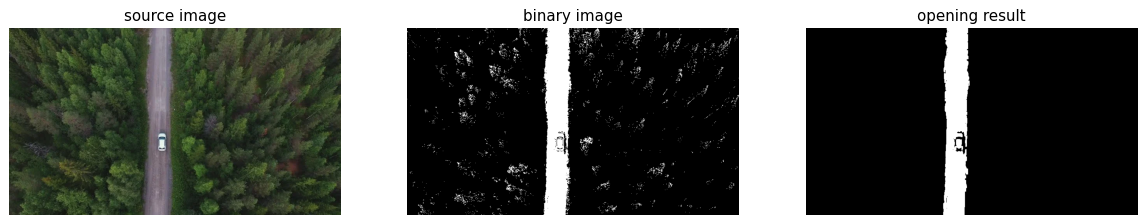

In [4]:
### BEGIN SOLUTION



### END SOLUTION


plt.figure(figsize=(16, 8), dpi=91)
plt.subplot(1,3,1)
plt.imshow(src_img)
plt.title('source image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(np.bitwise_not(binary_img),cmap='binary')
plt.title('binary image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(np.bitwise_not(opening_img),cmap='binary')
plt.title('opening result')
plt.axis('off')
plt.show()

In [5]:

assert (src_img[123,234,2] == 41) and (src_img[123,234,0] == 61), 'The colorspace of src_img is incorrect. It should be RGB channels.'
assert binary_img[213,221] == 0,f'The pixel(213,221) of binary image should be 0 expected, but got: {binary_img[213,221]}'
assert kernel_for_trees.shape == (7,3), f'The shape of kernel should be (7,3) expected, but got:{kernel_for_trees.shape}'
assert np.sum(kernel_for_trees) == 21, 'Incorrect kernel value.'
assert opening_img[304,410] == 255, f'The pixel(304,410) of opening result should be 255 expected , but got:{opening_img[304,410]}'


### Task 3: Get the car and fulfill the road
In this task you will use threshold method to locate the car and use it to fulfill the road.

Steps:
1. Convert the grayscale image into a binary image using threshold value __180__. Now you will get a binary image only contains the car.
2. Use closing operation with rectangular kernel of size 5x17 to fulfill the holes inside the car
3. Calculte the width and height of the car using the code example in below
4. Fill the road using closing operation with rectangular kernel of size (car_width, car_height)

Code example:
```
M = cv.moments(car_close)
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
car_width = cv.countNonZero(car_close[cY][:])
car_height = cv.countNonZero(car_close[:, cX])
```

Variables:
1. `car_img`: binary image only contains the car
2. `kernel_for_car`: kernel used in closing operation on `car_img`
3. `car_close`: closing result of `car_img`
4. `car_width`: width of the car
5. `car_height`: height of the car
6. `kernel_to_fulfill`: kernel used in closing operation on `opening_img`
7. `closing_img`: binary result containing the whole road

#### Quiz 3:

__What would you suggest to do when there are cars of the same size in the scene?__

Your answer:

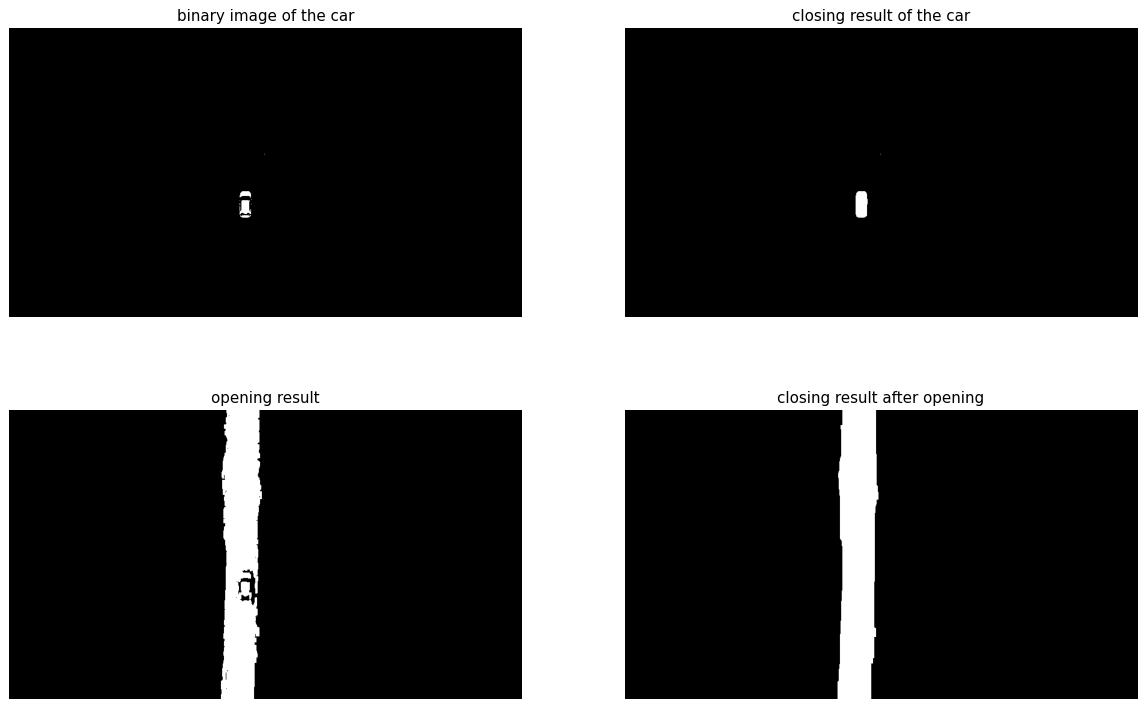

In [6]:
### BEGIN SOLUTION



### END SOLUTION


plt.figure(figsize=(16, 10), dpi=91)
plt.subplot(2,2,1)
plt.imshow(np.bitwise_not(car_img),cmap='binary')
plt.title('binary image of the car')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(np.bitwise_not(car_close),cmap='binary')
plt.title('closing result of the car')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(np.bitwise_not(opening_img),cmap='binary')
plt.title('opening result')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(np.bitwise_not(closing_img),cmap='binary')
plt.title('closing result after opening')
plt.axis('off')

plt.show()

### Task 4: Get the edge of the road
In this task you will implement the morphological operations to define the edge of the road

Steps:
1. Erode the `closing_img` using `kernel_8` above
2. Dilate the `closing_img` using `kernel_8` above
3. Use dilation result minus erosion result to get the edge (Outer boundary and Inner boundary)
4. Or you can just use `cv.morphologyEx` to do step 1-3 (check [this tutorial](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html))

Variables:
1. `edge_img`: binary image of the edge

#### Quiz 4:

__What will you do if you are expecting to get a straight line from the road boundary mask?__

Your answer:

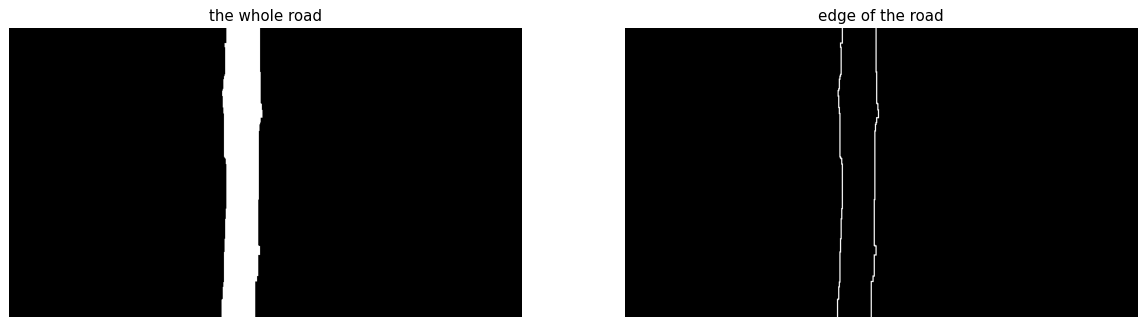

In [8]:
### BEGIN SOLUTION



### END SOLUTION


plt.figure(figsize=(16, 10), dpi=91)

plt.subplot(1,2,1)
plt.imshow(np.bitwise_not(closing_img),cmap='binary')
plt.title('the whole road')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(np.bitwise_not(edge_img),cmap='binary')
plt.title('edge of the road')
plt.axis('off')

plt.show()

In [9]:

assert (edge_img[434,355] == 255) and (edge_img[479,409] == 255), 'incorrect edge image'


### Task 5: Get the center line
In this task you will implement distance transform to detect the center line of the road

Steps:
1. Implement distance transformation on `closing_img`
2. Normalize the distance image into range (0, 1)
3. Convert the distance image into a binary image using threshold value 0.7
4. Skeletonize the binary distance image to get the center line

Variables:
1. `dist`: distance image
2. `middle_line`: binary image of the middle line (Ps: value only contains 0 and 255)

Hints:
1. Function [cv.distanceTransform](https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#ga25c259e7e2fa2ac70de4606ea800f12f) to get distance transform
2. Function [cv.normalize](https://docs.opencv.org/3.4/dc/d84/group__core__basic.html#ga1b6a396a456c8b6c6e4afd8591560d80) to normalize the image
3. Function [morphology.skeletonize](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.skeletonize) to skeletonize a binary image
4. check [this tutorial](https://docs.opencv.org/3.4/d2/dbd/tutorial_distance_transform.html) to learn how to use erosion, dilation, opening and closing operation in OpenCV

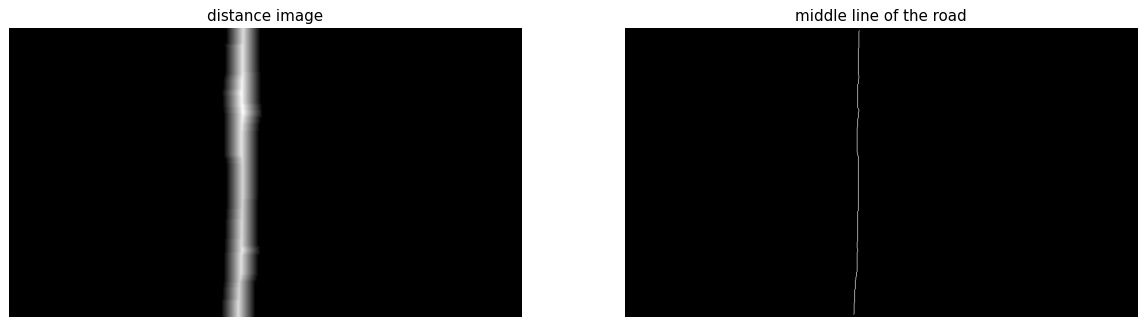

In [10]:
### BEGIN SOLUTION



### END SOLUTION


plt.figure(figsize=(16, 10), dpi=91)

plt.subplot(1,2,1)
plt.imshow(1.0-dist,cmap='binary')
plt.title('distance image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(1.0-middle_line,cmap='binary')
plt.title('middle line of the road')
plt.axis('off')
plt.show()

In [11]:

condition1 = ((int)(dist[242,370] / 0.01) == 30)
condition2 = ((int)(dist[357,385] / 0.01) == 84)
assert condition1 and condition2, 'incorrect distance image'

condition3 = (middle_line[241,387] == 255)
condition4 = (middle_line[372,385] == 255)
assert condition3 and condition4, 'incorrect middle line'


### Result
The following figure shows the result of the extracted road.

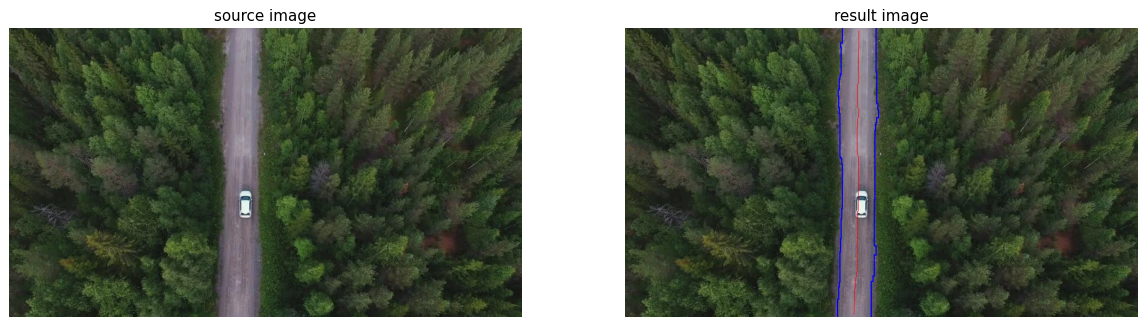

In [12]:
plt.figure(figsize=(16, 10), dpi=91)

plt.subplot(1,2,1)
plt.imshow(src_img)
plt.axis('off')
plt.title('source image')

result_img = src_img.copy()
result_img[edge_img==255] = [0,0,255]
result_img[middle_line==255] = [255,0,0]

plt.subplot(1,2,2)
plt.imshow(result_img)
plt.axis('off')
plt.title('result image')

plt.show()